In [216]:
# -*- coding: utf-8 -*-
from pandas import read_csv, DataFrame
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from itertools import product
import warnings
from sklearn.metrics import r2_score

import pandas as pd
import numpy as np
from scipy import stats

import statsmodels.api as sm

def invboxcox(x, lmbda = 0):
    if lmbda == 0:
        return(np.exp(x))
    else:
        return(np.exp(np.log(lmbda * x + 1) / lmbda))

In [217]:
dataset = read_csv('training.csv',
                     ',',
                     index_col=['Date'],
                     parse_dates=['Date'],
                     dayfirst=True)

In [218]:
datatest = read_csv('testing.csv',
                     ',',
                     index_col=['Date'],
                     parse_dates=['Date'],
                     dayfirst=True)

In [219]:
dataset['Value_boxcox'], lmbda = stats.boxcox(dataset.Value)

In [220]:
model_boxcox = sm.tsa.statespace.SARIMAX(dataset.Value_boxcox, 
                                      order=(3, 1, 1), 
                                      seasonal_order = (0, 0, 2, 12)).fit(disp = -1)
print ('Model AIC ', model_boxcox.aic)

/home/ivan/anaconda2/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


('Model AIC ', 806.97110487799318)


('R2 score ', 0.05489377909696791)


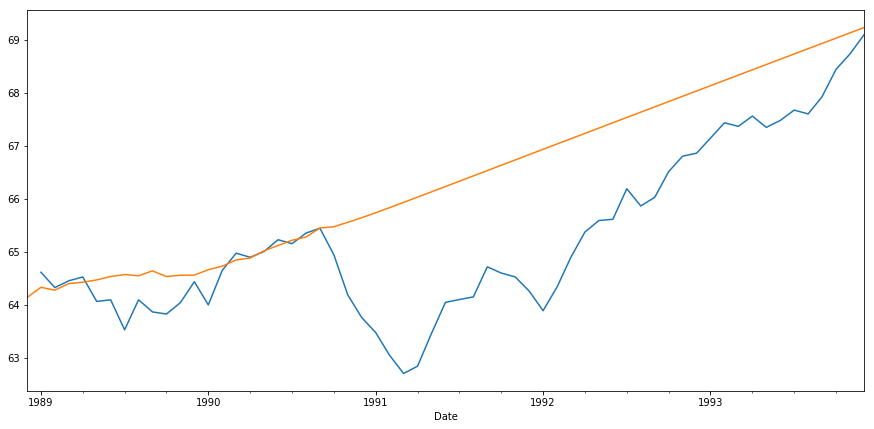

In [221]:
plt.figure(figsize=(15,7))
datatest.Value.plot()
pred_boxcox = invboxcox(model_boxcox.predict(start='1988-12-01', end='1993-12-01', typ = 'levels', dynamic = True), lmbda)
print ('R2 score ', r2_score(datatest.Value, pred_boxcox['1989-01-01':]))
pred_boxcox.plot()
plt.show()

In [222]:
model_boxcox = sm.tsa.statespace.SARIMAX(dataset.Value_boxcox, 
                                      order=(3, 1, 1), 
                                      seasonal_order = (2, 0, 2, 12)).fit(disp = -1)
print ('Model AIC ', model_boxcox.aic)

/home/ivan/anaconda2/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


('Model AIC ', 809.9616111514224)


('R2 score ', 0.49203156585833796)


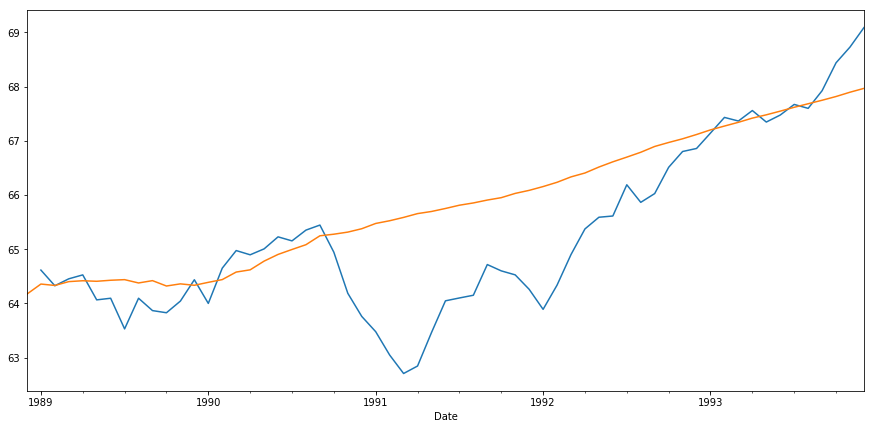

In [223]:
plt.figure(figsize=(15,7))
datatest.Value.plot()
pred_boxcox = invboxcox(model_boxcox.predict(start='1988-12-01', end='1993-12-01', typ = 'levels', dynamic = True), lmbda)
print ('R2 score ', r2_score(datatest.Value, pred_boxcox['1989-01-01':]))
pred_boxcox.plot()
plt.show()

In [230]:
model_boxcox = sm.tsa.statespace.SARIMAX(dataset.Value_boxcox, 
                                      order=(3, 1, 1), 
                                      seasonal_order = (3, 0, 2, 12)).fit(disp = -1)
print ('Model AIC ', model_boxcox.aic)

/home/ivan/anaconda2/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


('Model AIC ', 813.4811626486694)


('R2 score ', 0.53928104696745049)


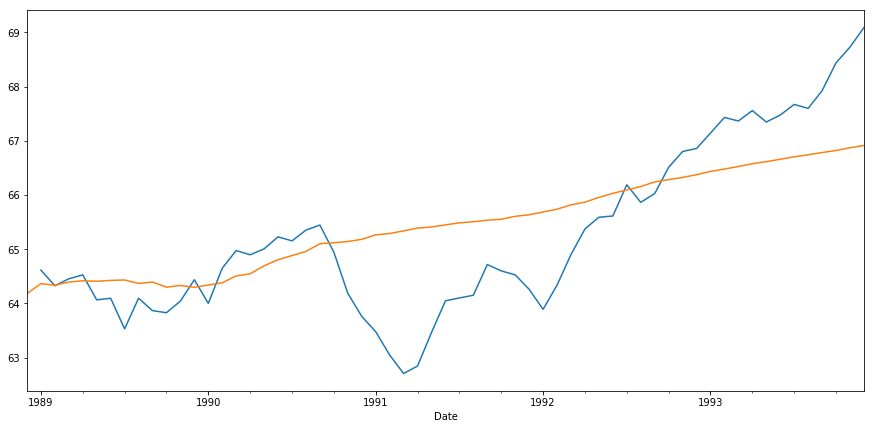

In [231]:
plt.figure(figsize=(15,7))
datatest.Value.plot()
pred_boxcox = invboxcox(model_boxcox.predict(start='1988-12-01', end='1993-12-01', typ = 'levels', dynamic = True), lmbda)
print ('R2 score ', r2_score(datatest.Value, pred_boxcox['1989-01-01':]))
pred_boxcox.plot()
plt.show()